In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.
{'cavs_degenerate': {'IC': array([ 42.       ,  23.       ,  42.5      ,  57.5      ,  70.2423896,
        93.5      , 170.       ]), 'OC': array([ 47.        ,  23.        ,  42.5       ,  57.5       ,
        70.59919029,  93.5       , 170.        ]), 'OC_R': array([ 47.        ,  23.        ,  42.5       ,  57.5       ,
        70.59919029,  93.5       , 170.        ]), 'BP': 'both', 'CELL TYPE': 'simplecell'}}
{   'cavs_degenerate': {   'CELL TYPE': 'mid-cell',
                           'FREQ': 801.5800812536467,
                           'IC': [   42.0,
                                     23.0,
                                     42.5,
                                     57.5,
                                     70.24238959559739,
                                     93.5,
                                     172.95431796913266,
                                     

<Axes: xlabel='$z$ [mm]', ylabel='$r$ [mm]'>

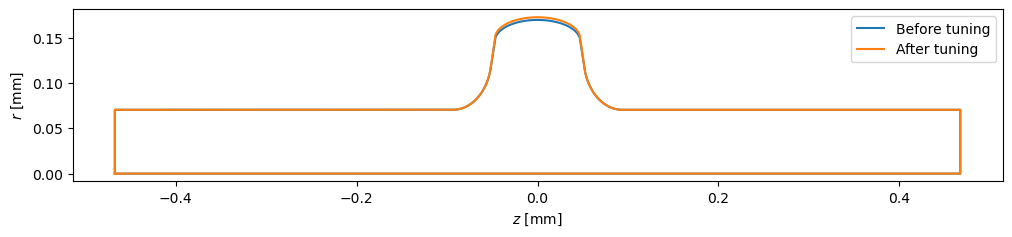

In [2]:
# define geometry parameters
midcell = np.array([42.0, 23.0, 42.5, 57.5, 70.24238959559739, 93.5, 170.0, 0])
endcell = np.array([47.0, 23.0, 42.5, 57.5, 70.59919028624745, 93.5, 170.0, 0])
endcell_r = np.array([47.0, 23.0, 42.5, 57.5, 70.59919028624745, 93.5, 170.0, 0])

# create cavity
cav_degenerate = Cavity(1, midcell, endcell, endcell, beampipe='both')
ax = cav_degenerate.plot('geometry', label='Before tuning')

cavs_degenerate = Cavities()
cavs_degenerate.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

cavs_degenerate.add_cavity(cav_degenerate, 'cavs_degenerate')

tune_config = {
    'freqs': 801.58,
    'parameters': 'Req',
    'cell_types': 'mid-cell',
    'processes': 1,
    'rerun': True
}
cavs_degenerate.run_tune(tune_config)
# cavs_degenerate.run_tune('A', freqs=801.58, cell_types='end cell', rerun=True, solver='ngsolve', n_cells=1)
pp.pprint(cavs_degenerate.eigenmode_tune_res)

# plot geometry after tuning
cav_degenerate.plot('geometry', ax, label='After tuning')

In [3]:
ax_obj_dict = cavs_degenerate.save_plot_as_json(ax)

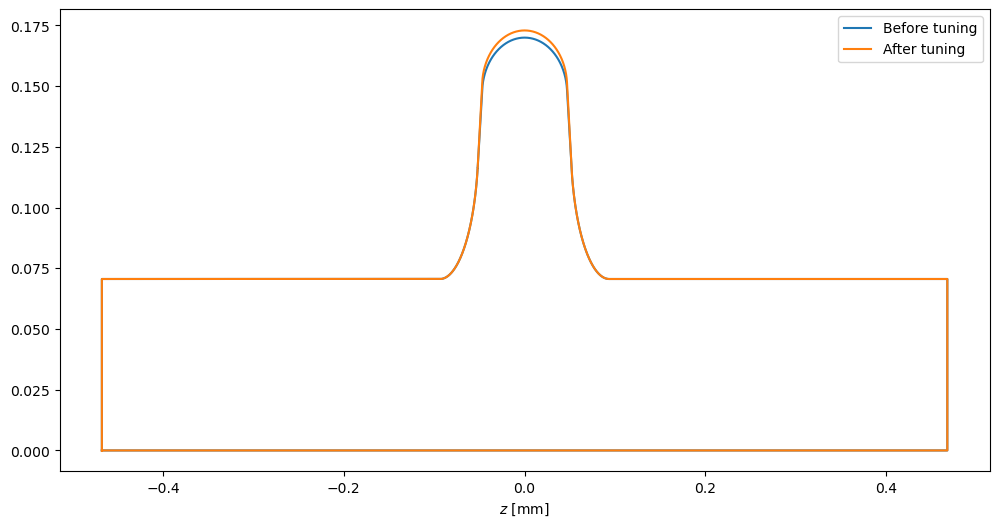

In [4]:
cavs_degenerate.plot_from_json(ax_obj_dict)

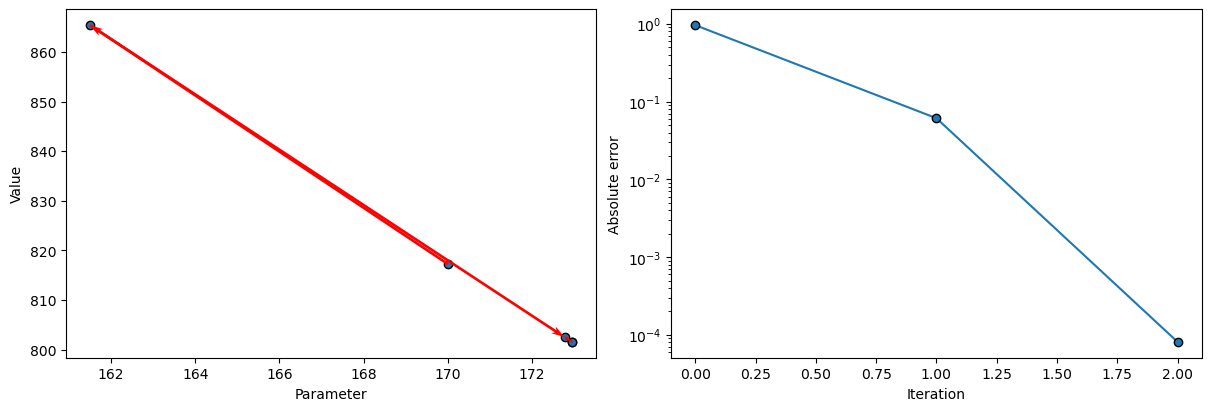

In [5]:
cavs_degenerate.plot('convergence')
plt.show()